# Model 1 - Horizontal stratigraphic

This is the most simpel model of horizontally stacked layers. We start by importing the necessary dependencies:

In [18]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [19]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/examples/input_data/model1_orientations.csv",
                        path_i = os.pardir+"/examples/input_data/model1_surface_points.csv") 

../..\gempy\data_management.py:1267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  values = np.vstack(map(np.ravel, g)).T.astype("float32")


In [20]:
geo_data.get_data()

X      Y      Z formation          series  \
interfaces   6   100.0  200.0  400.0     rock1  Default series   
             7   500.0  200.0  400.0     rock1  Default series   
             8   900.0  200.0  400.0     rock1  Default series   
             9   100.0  800.0  400.0     rock1  Default series   
             10  500.0  800.0  400.0     rock1  Default series   
             11  900.0  800.0  400.0     rock1  Default series   
             0   100.0  200.0  600.0     rock2  Default series   
             1   500.0  200.0  600.0     rock2  Default series   
             2   900.0  200.0  600.0     rock2  Default series   
             3   100.0  800.0  600.0     rock2  Default series   
             4   500.0  800.0  600.0     rock2  Default series   
             5   900.0  800.0  600.0     rock2  Default series   
             12    0.0    0.0    0.0  basement  Default series   
orientations 1   500.0  500.0  400.0     rock1  Default series   
             0   500.0  500.0  600.0     rock2  Default series   

                 formation_number  order_series  isFault           G_x  \
interfaces   6                  1             1    False           NaN   
             7                  1             1    False           NaN   
             8                  1             1    False           NaN   
             9                  1             1    False           NaN   
             10                 1             1    False           NaN   
             11                 1             1    False           NaN   
             0                  2             1    False           NaN   
             1                  2             1    False           NaN   
             2                  2             1    False           NaN   
             3                  2             1    False           NaN   
             4                  2             1    False           NaN   
             5                  2             1    False           NaN   
             12                 3             1    False           NaN   
orientations 1                  1             1    False  1.000000e-12   
             0                  2             1    False  1.000000e-12   

                          G_y  G_z  dip  azimuth  polarity  
interfaces   6            NaN  NaN  NaN      NaN       NaN  
             7            NaN  NaN  NaN      NaN       NaN  
             8            NaN  NaN  NaN      NaN       NaN  
             9            NaN  NaN  NaN      NaN       NaN  
             10           NaN  NaN  NaN      NaN       NaN  
             11           NaN  NaN  NaN      NaN       NaN  
             0            NaN  NaN  NaN      NaN       NaN  
             1            NaN  NaN  NaN      NaN       NaN  
             2            NaN  NaN  NaN      NaN       NaN  
             3            NaN  NaN  NaN      NaN       NaN  
             4            NaN  NaN  NaN      NaN       NaN  
             5            NaN  NaN  NaN      NaN       NaN  
             12           NaN  NaN  NaN      NaN       NaN  
orientations 1   1.000000e-12  1.0  0.0     90.0       1.0  
             0   1.000000e-12  1.0  0.0     90.0       1.0

Setting and ordering the units and series:

In [21]:
gp.set_series(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')},
              order_series = ['Strat_Series','Basement_Series'],
              order_formations=np.array(['rock2','rock1','basement']), verbose=0)

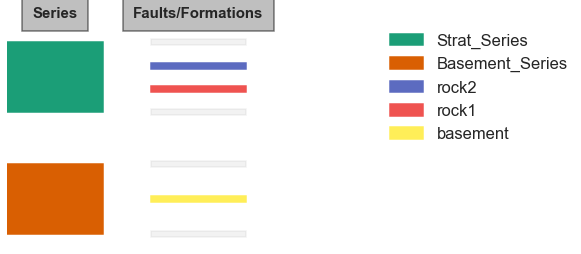

In [22]:
#%matplotlib inline
gp.get_sequential_pile(geo_data)

In [23]:
%matplotlib inline
#gp.plotting.plot_data(geo_data, direction='y')

Calculating the model:

In [25]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [26]:
lith_block, fault_block = gp.compute_model(interp_data)

C:\Users\Jan\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Displaying the result in x and y direction:

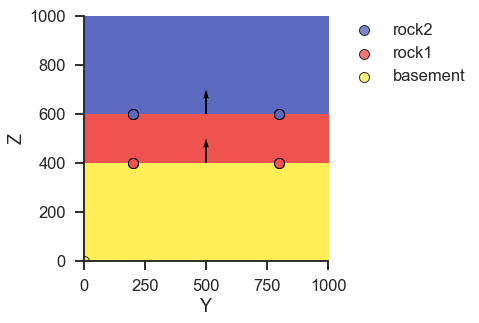

In [30]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=25,
                         direction='x', plot_data=True)

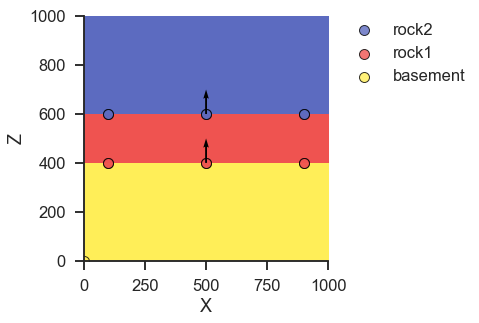

In [31]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=25,
                         direction='y', plot_data=True)